In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout

from keras.datasets import mnist


In [2]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

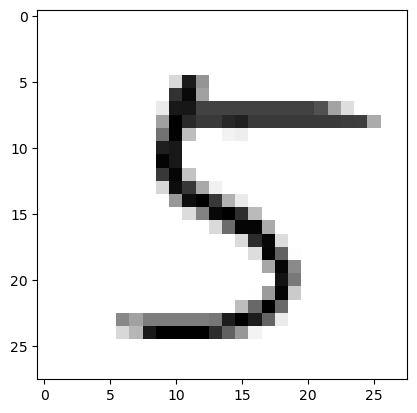

In [5]:
plt.imshow(X_train[1288],cmap=plt.cm.binary)

In [6]:
img = X_train[1000]

In [7]:
import seaborn as sns

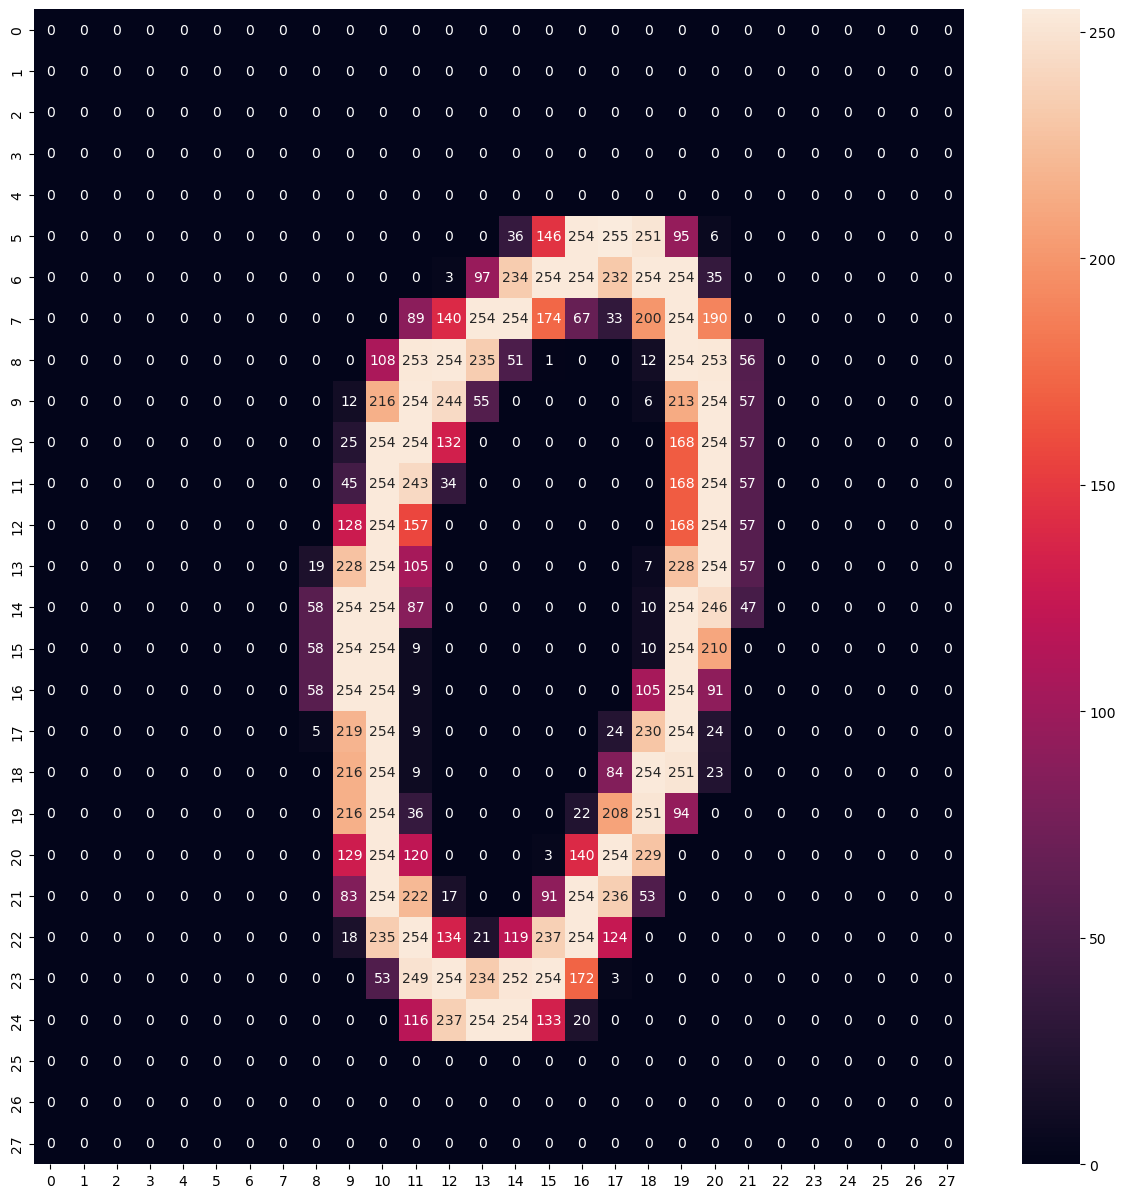

In [8]:
plt.figure(figsize= (15,15))
sns.heatmap(img, annot=True, fmt = '.3g')
plt.show()

In [9]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000, 784)

In [10]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [11]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [12]:
from keras.utils.np_utils import to_categorical

In [13]:
y_train = to_categorical(y_train)

In [14]:
model = Sequential()

# add input layer
model.add(Dense(input_dim=28*28, units=64, activation='relu'))
model.add(Dropout(0.2))

# add hidden layer
model.add(Dense( units=32, activation='relu'))
model.add(Dropout(0.2))

# add hidden layer
model.add(Dense( units=16, activation='relu'))
model.add(Dropout(0.2))

# add hidden layer
model.add(Dense( units=16, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense( units=10, activation='softmax'))

# model compile
model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam', metrics =['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                2

In [16]:
model.fit(X_train, y_train, epochs=10, validation_split= 0.1)

Epoch 1/10
1688/1688 [==============================] - 5s 2ms/step - loss: 2.4898 - accuracy: 0.2687 - val_loss: 1.1831 - val_accuracy: 0.6232
Epoch 2/10
1688/1688 [==============================] - 4s 2ms/step - loss: 1.4374 - accuracy: 0.4970 - val_loss: 0.8613 - val_accuracy: 0.6645
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 1.1615 - accuracy: 0.5952 - val_loss: 0.6624 - val_accuracy: 0.7867
Epoch 4/10
1688/1688 [==============================] - 3s 2ms/step - loss: 1.0189 - accuracy: 0.6461 - val_loss: 0.5990 - val_accuracy: 0.8098
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.9593 - accuracy: 0.6711 - val_loss: 0.5554 - val_accuracy: 0.8247
Epoch 6/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.9066 - accuracy: 0.6910 - val_loss: 0.4996 - val_accuracy: 0.8378
Epoch 7/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.8623 - accuracy: 0.7067 - val_loss: 0.4753 - val_accuracy:

In [17]:
y_predict = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [18]:
y_predict[133] * 100

array([3.8822235e-12, 3.2088132e-14, 1.1075288e-02, 8.0620512e-02,
       7.2464723e-06, 2.9329753e-10, 1.3610661e-16, 9.9895569e+01,
       3.8416371e-12, 1.2718387e-02], dtype=float32)

In [19]:
y_pred_classes = np.argmax(y_predict, axis = 1)
y_pred_classes

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [20]:
class_names = ['0','1', '2', '3', '4', '5', '6', '7' ,'8' ,'9']

SyntaxError: invalid non-printable character U+00A0 (676461167.py, line 1)

In [ ]:
def plot_image(i, y_pred, y_test_class, img):
    y_pred, y_test_class, img = y_pred[i], y_test_class[i], img[i]
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(y_pred)
    
    if predicted_label == y_test_class:
        color = 'blue'
    else:
        color = 'red'
    predicted = class_names[predicted_label]
    probability = round(100 * np.max(y_pred), 2)
    actual_class = class_names[y_test_class]
    plt.xlabel(f'{predicted}, {probability}%, ({actual_class})', color=color)

In [ ]:
num_rows = 8
num_cols = 8

num_images = num_rows * num_cols

plt.figure(figsize=(2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(i, y_pred, y_test, X_test.reshape(10000, 28, 28))
plt.show()